<a href="https://colab.research.google.com/github/hun9008/ML_TeamProject_24SS/blob/main/preprocessing/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
import pickle
import random
from PIL import Image
import PIL
PIL.Image

<module 'PIL.Image' from '/usr/local/lib/python3.10/dist-packages/PIL/Image.py'>

In [ ]:
cd /content/drive/MyDrive/data/first_data/

/content/drive/.shortcut-targets-by-id/1G6SgIRKCYt5sUkkaCAiAmdP0_hZA-rFs/data/first_data


In [ ]:
ls

incipient/  mature/  no/  original_data.ipynb  overripe/


In [ ]:
# 데이터 경로 설정
image_path = "/content/drive/MyDrive/data/first_data/"

# 라벨별 분포


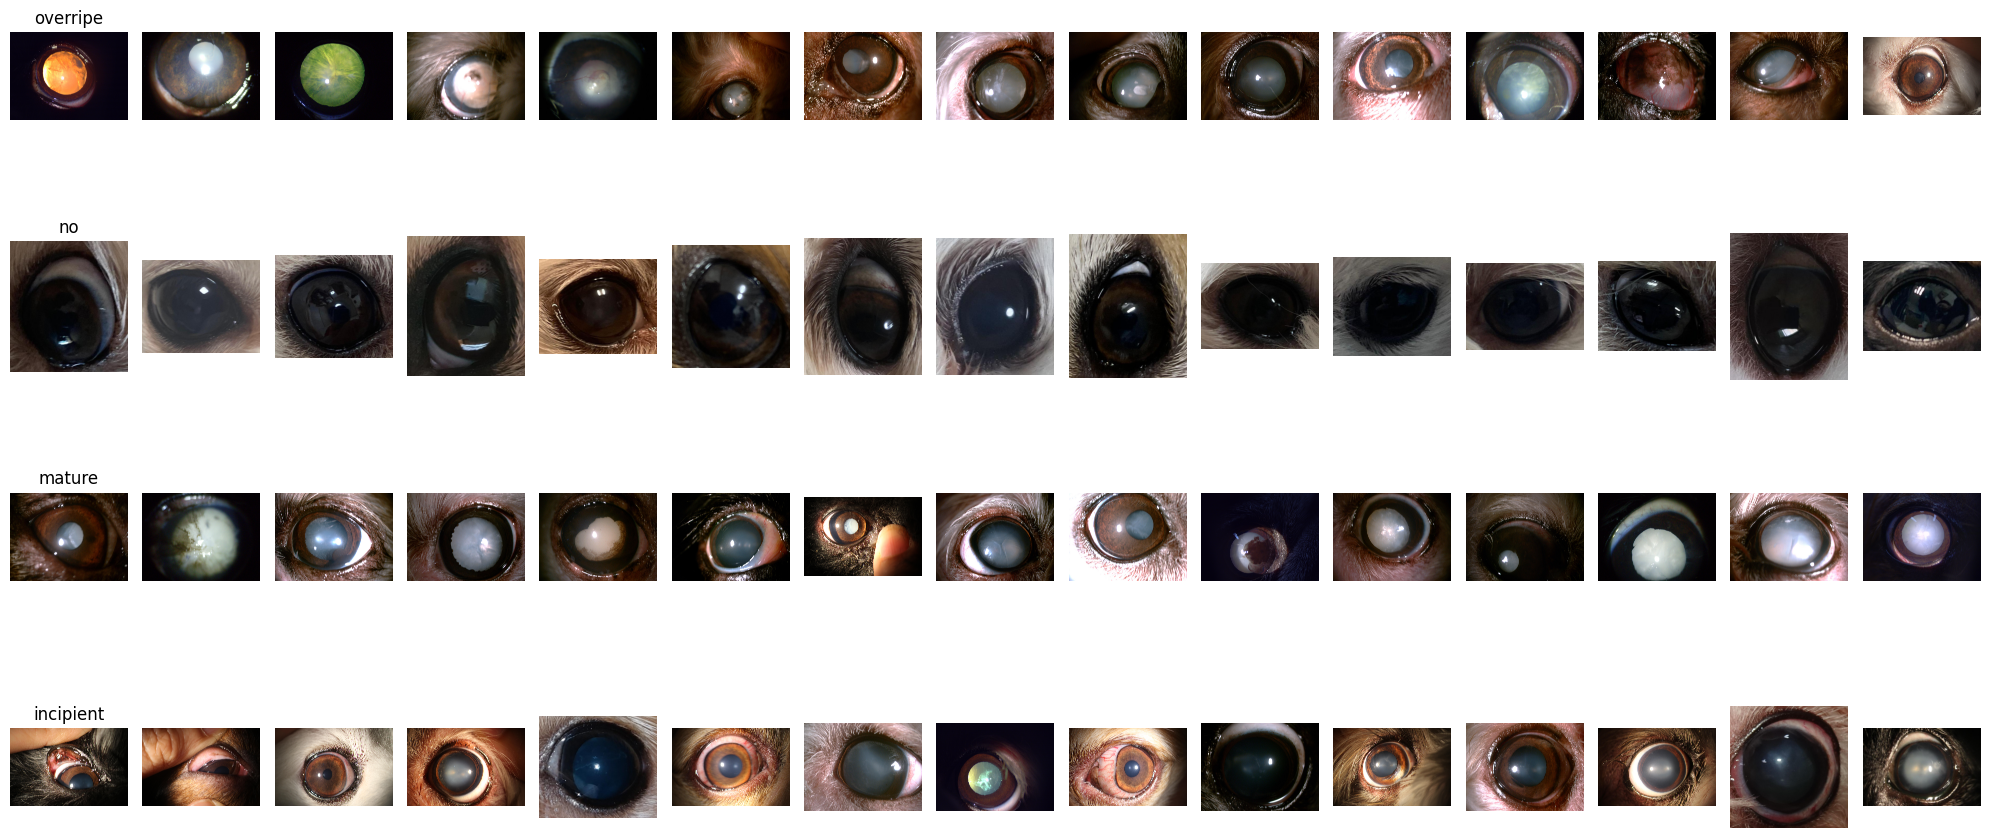

In [ ]:
# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 출력할 이미지 개수
num_images = 15

# 이미지 출력을 위한 서브플롯 생성
fig, axs = plt.subplots(len(class_dirs), num_images, figsize=(20, 10))

for i, class_dir in enumerate(class_dirs):
    # 클래스 디렉토리 내의 모든 이미지 파일 경로 리스트 생성
    image_files = [os.path.join(image_path, class_dir, filename)
                   for filename in os.listdir(os.path.join(image_path, class_dir))
                   if filename.endswith('.jpg') or filename.endswith('.png')]

    # 이미지 파일 경로 리스트에서 랜덤하게 15개 선택
    selected_files = random.sample(image_files, num_images)

    for j, file_path in enumerate(selected_files):
        # 이미지 파일 읽기
        img = Image.open(file_path)

        # 이미지 출력
        axs[i, j].imshow(img)
        axs[i, j].axis('off')

        # 첫 번째 이미지에만 클래스 레이블 표시
        if j == 0:
            axs[i, j].set_title(class_dir)

plt.tight_layout()
plt.show()

# 데이터 정보 시각화



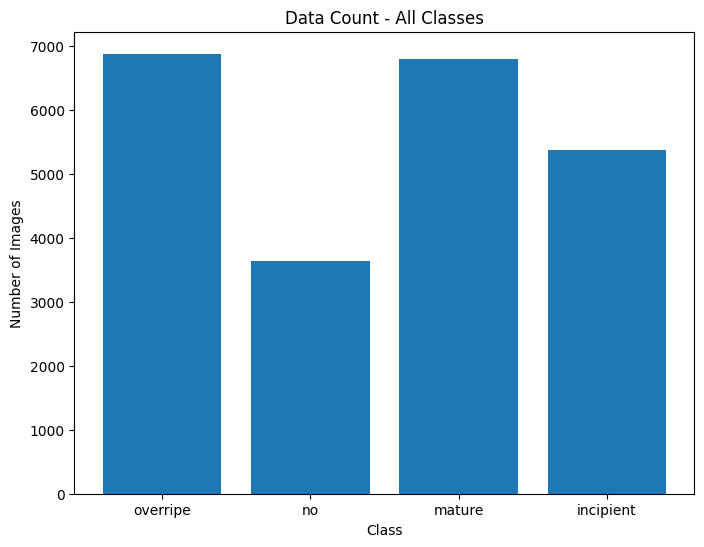

In [ ]:
import os
import matplotlib.pyplot as plt

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 데이터 수를 저장할 딕셔너리
data_counts = {}

# 각 클래스별로 데이터 수 조사
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    # 클래스 디렉토리 내의 모든 이미지 파일 수 계산
    num_files = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

    data_counts[class_dir] = num_files

# 데이터 수를 막대 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(class_dirs, [data_counts[class_dir] for class_dir in class_dirs])

ax.set_title("Data Count - All Classes")
ax.set_xlabel("Class")
ax.set_ylabel("Number of Images")

plt.show()

# 확장자

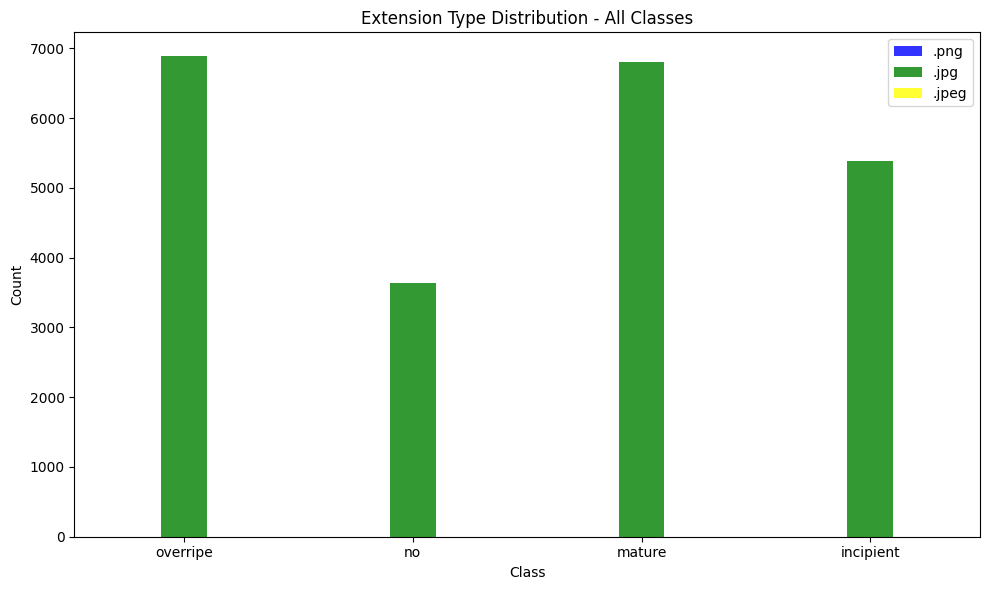

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 확장자 타입을 저장할 딕셔너리
extension_types = {}

# 각 클래스별로 확장자 타입 조사
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    extension_counts = {}

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        _, extension = os.path.splitext(filename)
        extension = extension.lower()

        if extension in ['.png', '.jpg', '.jpeg']:
            if extension not in extension_counts:
                extension_counts[extension] = 0
            extension_counts[extension] += 1

    extension_types[class_dir] = extension_counts

# 확장자 타입별 색상 설정
extension_colors = {'.png': 'blue', '.jpg': 'green', '.jpeg': 'yellow'}

# 확장자 타입을 막대 그래프로 시각화
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
opacity = 0.8
index = np.arange(len(class_dirs))

for i, extension in enumerate(['.png', '.jpg', '.jpeg']):
    counts = [extension_types[class_dir].get(extension, 0) for class_dir in class_dirs]
    ax.bar(index + i * bar_width, counts, bar_width, alpha=opacity, color=extension_colors[extension], label=extension)

ax.set_title("Extension Type Distribution - All Classes")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_dirs)
ax.legend()

plt.tight_layout()
plt.show()

# 사이즈


Number of images exceeding max size:
overripe: 6259
no: 0
mature: 5859
incipient: 4440


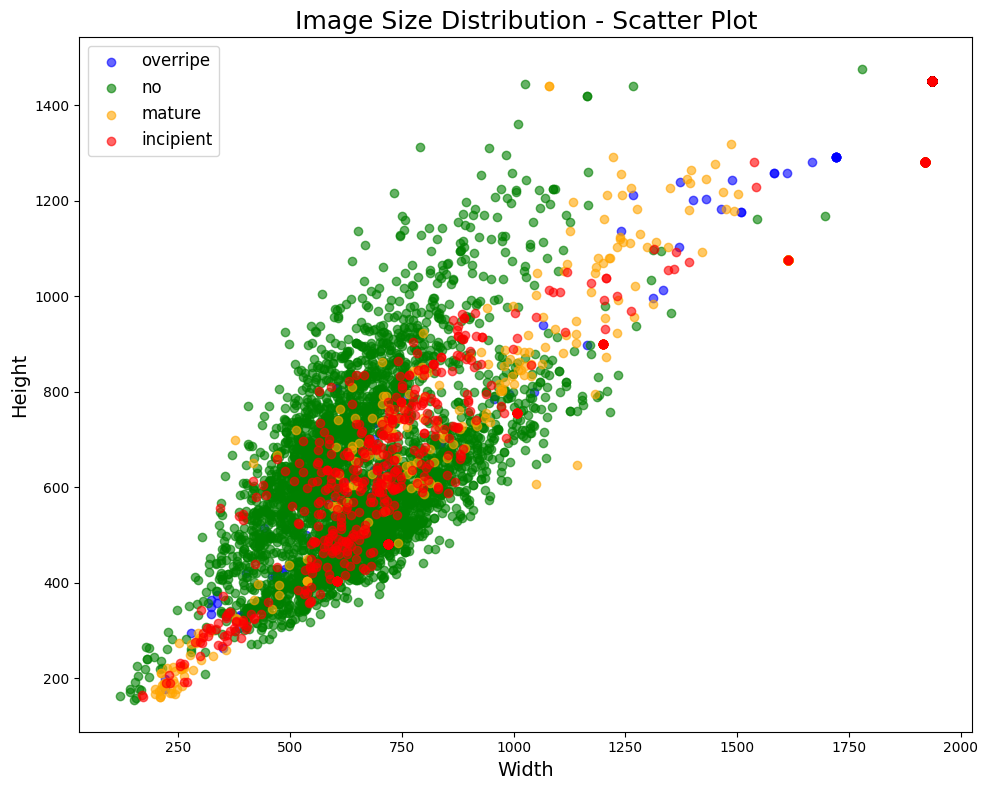

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 이미지 사이즈를 저장할 리스트
image_sizes = []
class_labels = []

# 최대 이미지 크기 설정
max_width = 2000
max_height = 2000

# 각 클래스별로 이미지 사이즈 조사
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        file_path = os.path.join(class_path, filename)

        # 이미지 파일인 경우에만 처리
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as img:
                width, height = img.size

                if width <= max_width and height <= max_height:
                    image_sizes.append((width, height))
                    class_labels.append(class_dir)

# 산점도 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']

for i, class_dir in enumerate(class_dirs):
    class_sizes = [size for size, label in zip(image_sizes, class_labels) if label == class_dir]
    widths, heights = zip(*class_sizes)
    ax.scatter(widths, heights, c=colors[i], alpha=0.6, label=class_dir)

ax.set_title("Image Size Distribution - Scatter Plot", fontsize=18)
ax.set_xlabel("Width", fontsize=14)
ax.set_ylabel("Height", fontsize=14)
ax.legend(fontsize=12)

# 최대 크기 초과 이미지 개수 출력
print("Number of images exceeding max size:")
for class_dir in class_dirs:
    max_size_count = sum(1 for filename in os.listdir(os.path.join(image_path, class_dir))
                         if os.path.isfile(os.path.join(image_path, class_dir, filename))
                         and filename.lower().endswith(('.png', '.jpg', '.jpeg'))
                         and (Image.open(os.path.join(image_path, class_dir, filename)).size[0] > max_width
                              or Image.open(os.path.join(image_path, class_dir, filename)).size[1] > max_height))
    print(f"{class_dir}: {max_size_count}")

plt.tight_layout()
plt.show()

# 이상치 탐지

전처리를 마친 데이터들에 대하여

In [ ]:
# 데이터 경로 설정
image_path = "/content/drive/MyDrive/data/Final_data/"

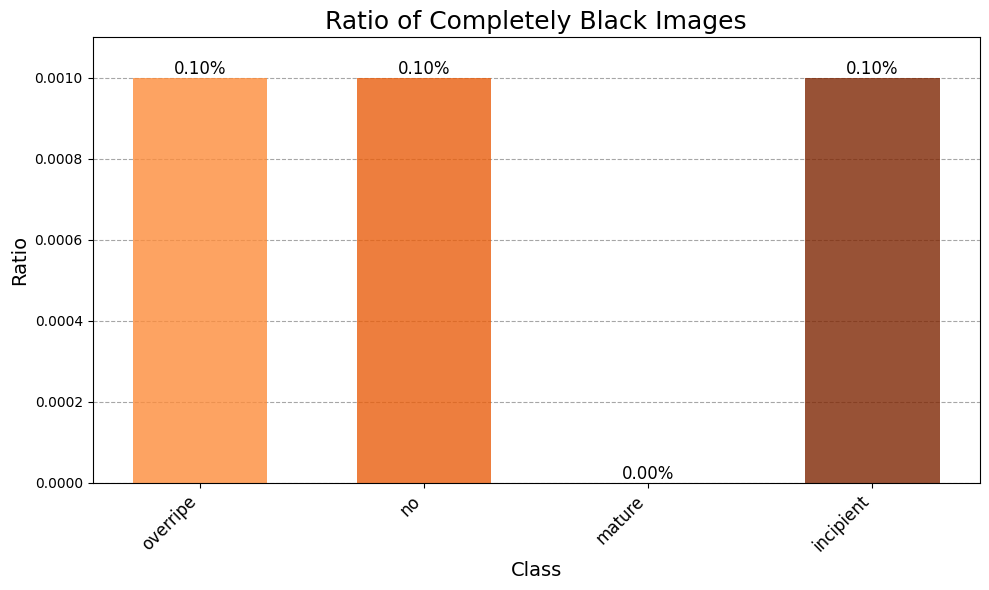

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 완전 검정색 이미지의 비율을 저장할 딕셔너리
black_image_ratios = {}

# 각 클래스별로 완전 검정색 이미지의 비율 조사
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)
    total_images = 0
    black_images = 0

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        file_path = os.path.join(class_path, filename)

        # 이미지 파일인 경우에만 처리
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as img:
                # 이미지를 numpy 배열로 변환
                img_array = np.array(img)

                # 이미지가 완전 검정색인지 확인
                if np.all(img_array == 0):
                    black_images += 1

            total_images += 1

    # 완전 검정색 이미지의 비율 계산
    black_image_ratio = black_images / total_images if total_images > 0 else 0
    black_image_ratios[class_dir] = black_image_ratio

# 완전 검정색 이미지 비율을 막대 그래프로 시각화
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6
opacity = 0.8
index = np.arange(len(class_dirs))

# 색상 팔레트 설정
colors = plt.cm.Oranges(np.linspace(0.5, 1.0, len(class_dirs)))

ratios = [black_image_ratios[class_dir] for class_dir in class_dirs]
bars = ax.bar(index, ratios, bar_width, alpha=opacity, color=colors)

# 막대 위에 백분율 값 표시
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2%}", ha='center', va='bottom', fontsize=12)

ax.set_title("Ratio of Completely Black Images", fontsize=18)
ax.set_xlabel("Class", fontsize=14)
ax.set_ylabel("Ratio", fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(class_dirs, rotation=45, ha='right', fontsize=12)
ax.set_ylim(0, max(ratios) * 1.1)  # Y축 범위를 데이터에 맞게 조정

# 그리드 추가
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

plt.tight_layout()
plt.show()